In [1]:
import pandas as pd
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('e:\\Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:

data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data = pd.DataFrame(data)
enc  = LabelEncoder()
enc.fit(data['Gender'])
data['new Gender '] = enc.transform(data['Gender'])
data['Gender']=data['new Gender ']
data=data.iloc[:,0:5]
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


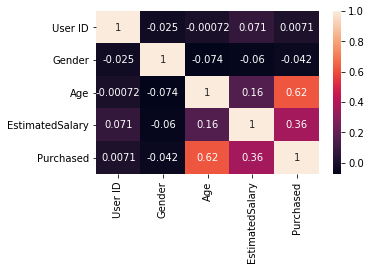

In [8]:
plt.figure(figsize=(5,3))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [9]:
data=data.iloc[:,1:]
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


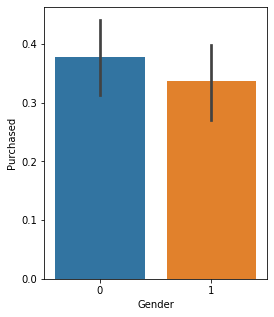

In [10]:
plt.figure(figsize=(4,5))
sns.barplot(data['Gender'], data['Purchased'])
plt.show()

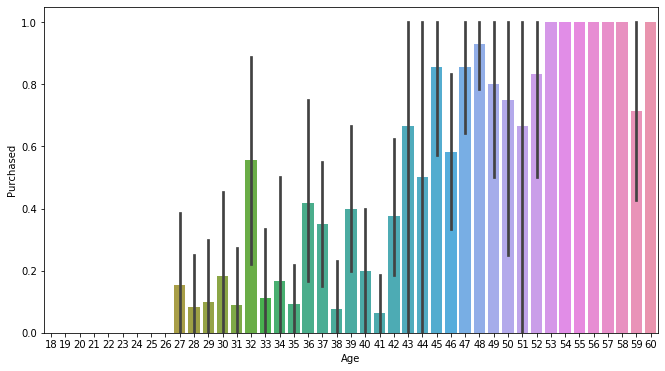

In [11]:
plt.figure(figsize=(11,6))
sns.barplot(data['Age'], data['Purchased'])
plt.show()

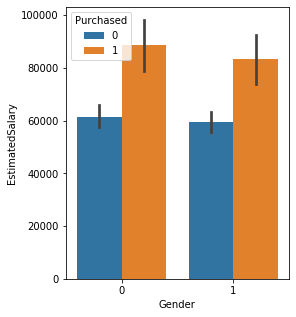

In [12]:
plt.figure(figsize=(4,5))
sns.barplot(data['Gender'], data['EstimatedSalary'], hue=data['Purchased'])
plt.show()

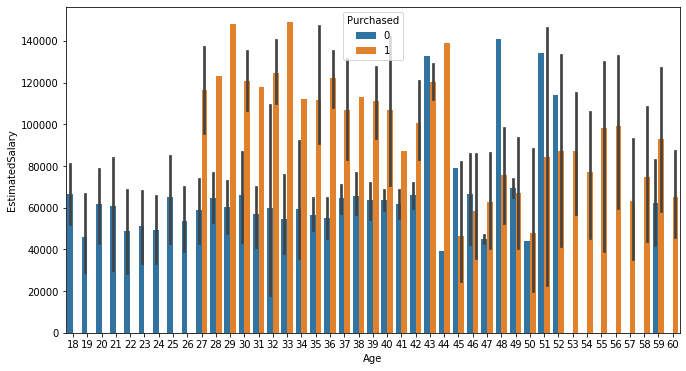

In [13]:
plt.figure(figsize=(11,6))
sns.barplot(data['Age'], data['EstimatedSalary'], hue=data['Purchased'])
plt.show()

In [14]:
ndata=data.groupby('Age',as_index=False)['Purchased'].mean()
ndata[:5]

,Age,Purchased
0,18,0.0
1,19,0.0
2,20,0.0
3,21,0.0
4,22,0.0


In [15]:
ndata.sort_values("Purchased",ascending=False).head(10)

,Age,Purchased
42,60,1.000000
40,58,1.000000
39,57,1.000000
38,56,1.000000
37,55,1.000000
36,54,1.000000
35,53,1.000000
30,48,0.928571
29,47,0.857143
27,45,0.857143


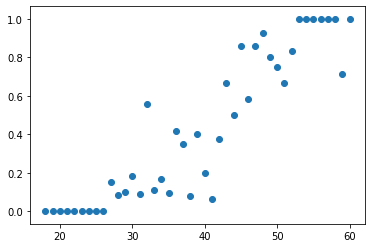

In [16]:
plt.scatter(x=ndata["Age"],y=ndata['Purchased'])

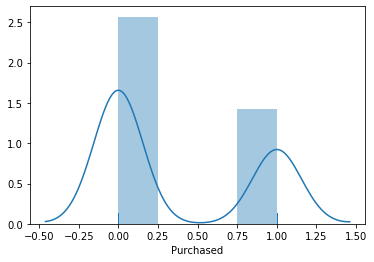

In [17]:

sns.distplot(data['Purchased'],rug=True)
plt.show()

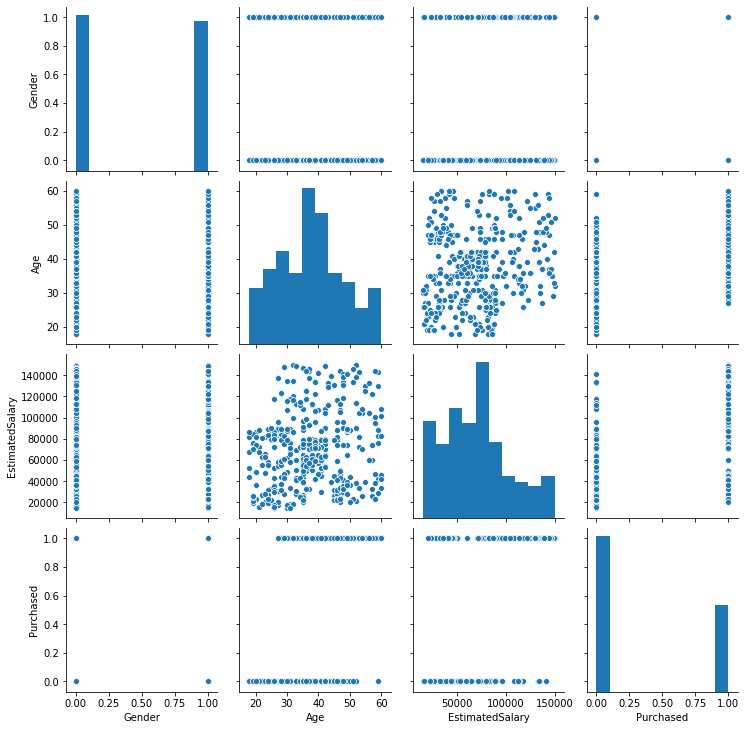

In [18]:
sns.pairplot(data=data)

In [19]:

X = data.drop(['Purchased'], axis = 1)
y = data.Purchased.values


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [22]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)

LogisticRegressionModel Train Score is :  0.83
LogisticRegressionModel Test Score is :  0.9


Confusion Matrix is : 
 [[65  3]
 [ 7 25]]


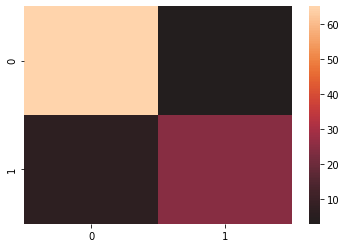

In [23]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

In [24]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) 
DecisionTreeClassifierModel.fit(X_train, y_train)


print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

y_pred = DecisionTreeClassifierModel.predict(X_test)



DecisionTreeClassifierModel Train Score is :  0.9166666666666666
DecisionTreeClassifierModel Test Score is :  0.94


Confusion Matrix is : 
 [[64  4]
 [ 2 30]]


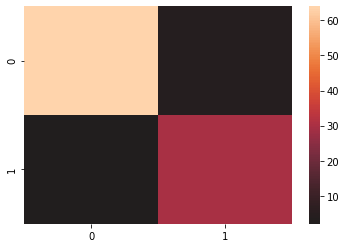

In [25]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

In [26]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
y_pred = SVCModel.predict(X_test)
#print('Predicted Value for SVCModel is : ' , y_pred[:10])

SVCModel Train Score is :  0.9033333333333333
SVCModel Test Score is :  0.93


F:\ana\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix is : 
 [[64  4]
 [ 3 29]]


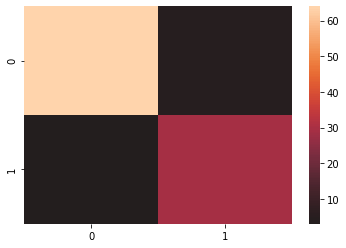

In [27]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

Text(0.5, 1.0, 'Model Accracy')

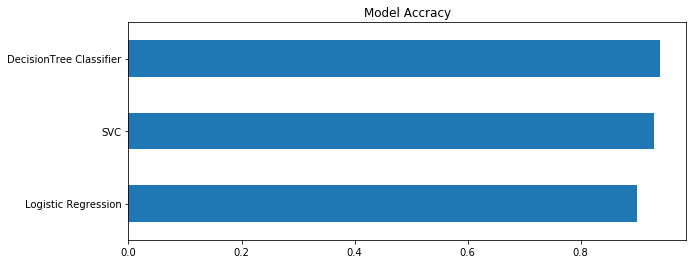

In [28]:

model_accuracy = pd.Series(data=[LogisticRegressionModel.score(X_test, y_test),
                                 DecisionTreeClassifierModel.score(X_test, y_test),
                                                                   SVCModel.score(X_test, y_test)], 
        index=['Logistic Regression','DecisionTree Classifier','SVC'])
fig= plt.figure(figsize=(10,4))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

